In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df_train = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")

In [4]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [5]:
df_test = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")

In [6]:
df_test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [8]:
df_train.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [9]:
df_train['num_sold'].describe()

count    221259.000000
mean        752.527382
std         690.165445
min           5.000000
25%         219.000000
50%         605.000000
75%        1114.000000
max        5939.000000
Name: num_sold, dtype: float64

In [10]:
df_train = df_train.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8bbda7ab90>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8bbda7b0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8bbda7a8f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8bbda7b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8bbda7b8b0>],
 'means': []}

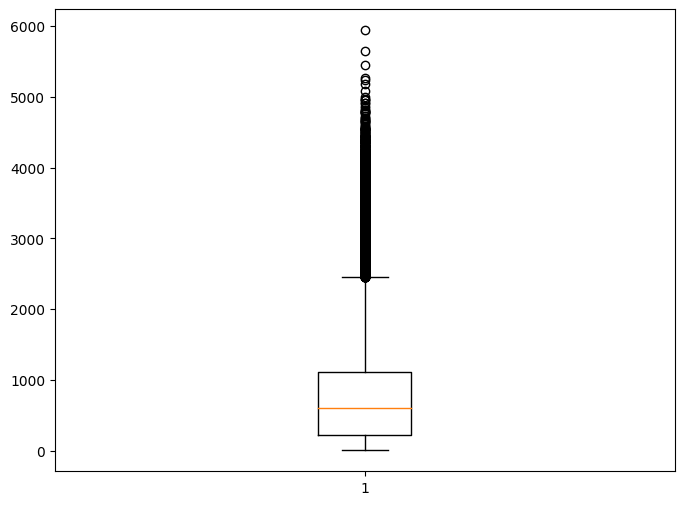

In [11]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_train["num_sold"])

<Axes: title={'center': 'Total Items Sold by Country'}, xlabel='country'>

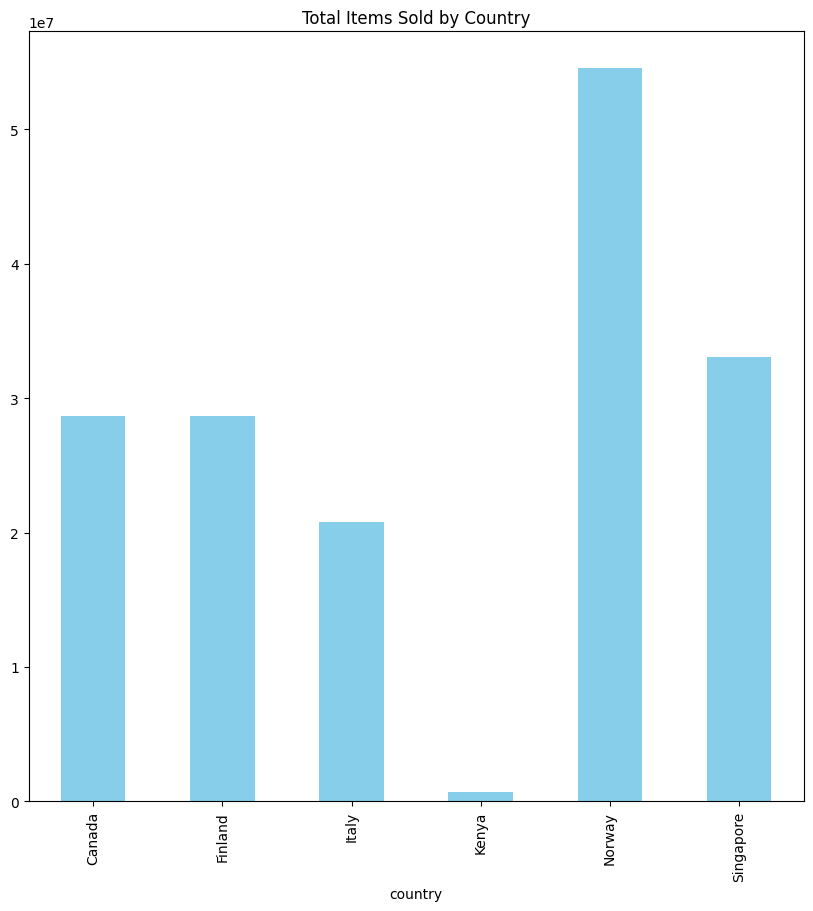

In [12]:
df_train.groupby('country')['num_sold'].sum().plot(
    kind='bar', figsize=(10, 10), color='skyblue', title='Total Items Sold by Country'
)

<Axes: title={'center': 'Total Items Sold by Country'}, xlabel='store'>

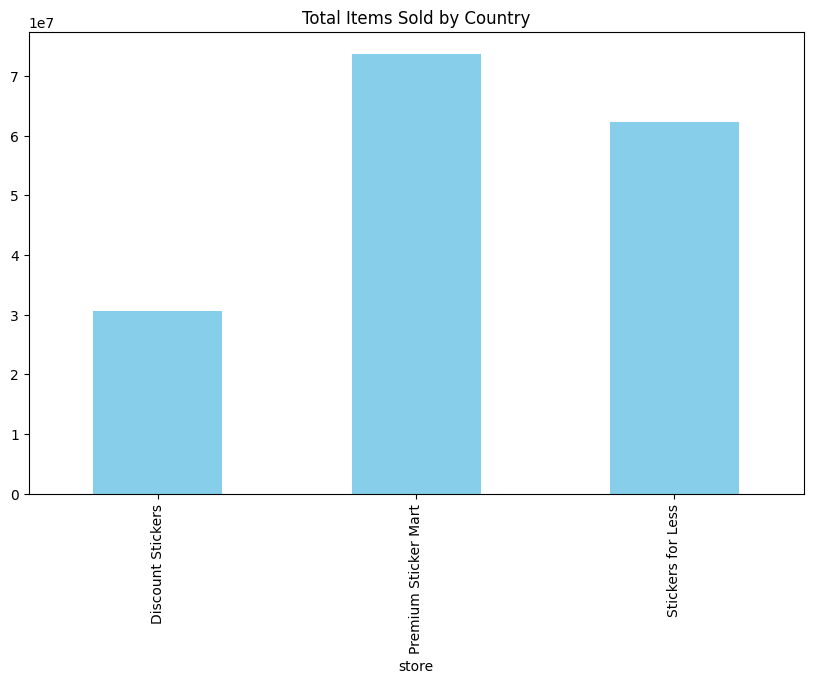

In [13]:

df_train.groupby('store')['num_sold'].sum().plot(
    kind='bar', figsize=(10, 6), color='skyblue', title='Total Items Sold by Country'
)

<Axes: title={'center': 'Total Items Sold by Country'}, xlabel='product'>

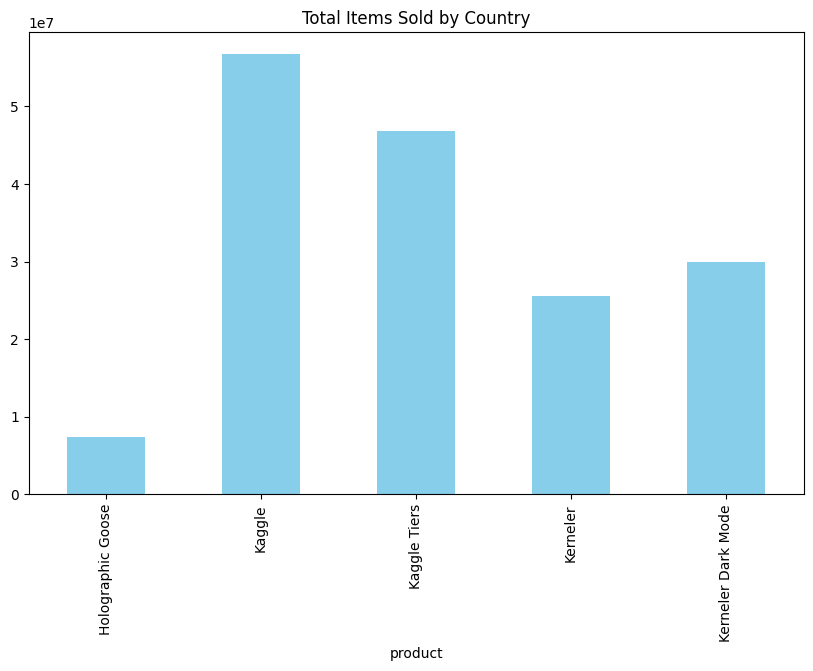

In [14]:
df_train.groupby('product')['num_sold'].sum().plot(
    kind='bar', figsize=(10, 6), color='skyblue', title='Total Items Sold by Country'
)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
df_train['country'] = encoder.fit_transform(df_train['country'])
df_test['country'] = encoder.transform(df_test['country'])

In [18]:
country_label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Country Label Mappings:\n", country_label_mapping)

Country Label Mappings:
 {'Canada': 0, 'Finland': 1, 'Italy': 2, 'Kenya': 3, 'Norway': 4, 'Singapore': 5}


In [19]:
df_train['store'] = encoder.fit_transform(df_train['store'])
df_test['store'] = encoder.transform(df_test['store'])

store_label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Store Label Mappings:\n", store_label_mapping)

Store Label Mappings:
 {'Discount Stickers': 0, 'Premium Sticker Mart': 1, 'Stickers for Less': 2}


In [20]:
df_train['product'] = encoder.fit_transform(df_train['product'])
df_test['product'] = encoder.transform(df_test['product'])

product_label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Product Label Mappings:\n", product_label_mapping)

Product Label Mappings:
 {'Holographic Goose': 0, 'Kaggle': 1, 'Kaggle Tiers': 2, 'Kerneler': 3, 'Kerneler Dark Mode': 4}


In [21]:
df_train.head(10)

,id,date,country,store,product,num_sold
1,1,2010-01-01,0,0,1,973.0
2,2,2010-01-01,0,0,2,906.0
3,3,2010-01-01,0,0,3,423.0
4,4,2010-01-01,0,0,4,491.0
5,5,2010-01-01,0,2,0,300.0
6,6,2010-01-01,0,2,1,1837.0
7,7,2010-01-01,0,2,2,1659.0
8,8,2010-01-01,0,2,3,807.0
9,9,2010-01-01,0,2,4,940.0
10,10,2010-01-01,0,1,0,375.0


In [22]:
Y = df_train['num_sold']
X = df_train.drop(columns = ['num_sold','date','id'])

In [23]:
X.head()

,country,store,product
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4
5,0,2,0


In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state = 42)

# XG BOOST

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [26]:
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    n_estimators=300,
    subsample=0.9
)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}

In [27]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


RMSE: 170.2499
R² Score: 0.9394


In [29]:
model.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
df_test_id = df_test['id']
df_test = df_test.drop(columns= ['date','id'])

In [31]:
df_pred = model.predict(df_test)

In [32]:
df_pred

array([ 100.68112,  715.6238 ,  592.7885 , ..., 1604.3116 ,  875.4756 ,
       1024.6743 ], dtype=float32)

In [33]:
output = pd.DataFrame(
    {
        'id':df_test_id,
        'num_sold': df_pred
    }
)

In [34]:
output.head()

,id,num_sold
0,230130,100.681122
1,230131,715.623779
2,230132,592.788513
3,230133,323.598206
4,230134,377.922394


In [35]:
output.to_csv('submission.csv', index = False)

In [36]:
output.shape

(98550, 2)